# 02 - Clasificación con Keras

Vamos a entrenar un modelo de Keras para clasificar imagenes de ropa.

Usaremos el conjunto de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70.000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolución baja (28x28 pixeles) como se ve en la siguiente imagen:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST esta construido como un reemplazo para el conjunto de datos clasico [MNIST](http://yann.lecun.com/exdb/mnist/) 
casi siempre utilizado como el "Hola Mundo" de los sistemas de visión por computadora. El conjunto de datos de MNIST contiene imágenes de dígitos escrito a mano (0, 1, 2, etc.) en un formato idéntico al de los artículos de ropa que vamos a utilizar.


Las imagenes son arrays de numpy de 28x28 pixeles, con valores comprendidos entre 0 y 255, los valores de los pixeles. Las etiquetas de integros, que van del 0 al 9. Estos corresponden a la *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. 

In [1]:
# librerias

import warnings
warnings.filterwarnings('ignore')

from keras.datasets import fashion_mnist

from keras import Sequential, Input
from keras.layers import Flatten, Dense

import numpy as np

import pylab as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as report

In [2]:
# etiquetas

label_names = {0: 'T-shirt/top', 
               1: 'Trouser', 
               2: 'Pullover', 
               3: 'Dress', 
               4: 'Coat',
               5: 'Sandal', 
               6: 'Shirt', 
               7: 'Sneaker', 
               8: 'Bag', 
               9: 'Ankle boot'}

**Caraga de datos**

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
# 60k imagenes de 28x28 pixeles para entrenar y 10k para testear con sus etiquetas

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### Exploración de los datos

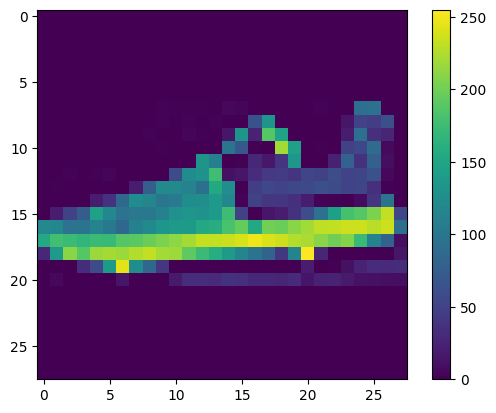

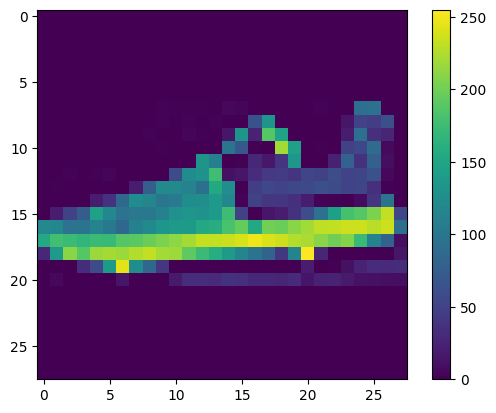

In [5]:
# valores entre 0 y 255

plt.imshow(X_train[29000])
plt.colorbar();

Los datos de entrada en una red neuronal tienen que ser normalizados. En este caso, dividir entre el máximo (255)

In [6]:
X_train = X_train/255.

X_test = X_test/255.

Para verificar que el conjunto de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a ver las primeras 25 imagenes con su nombre.

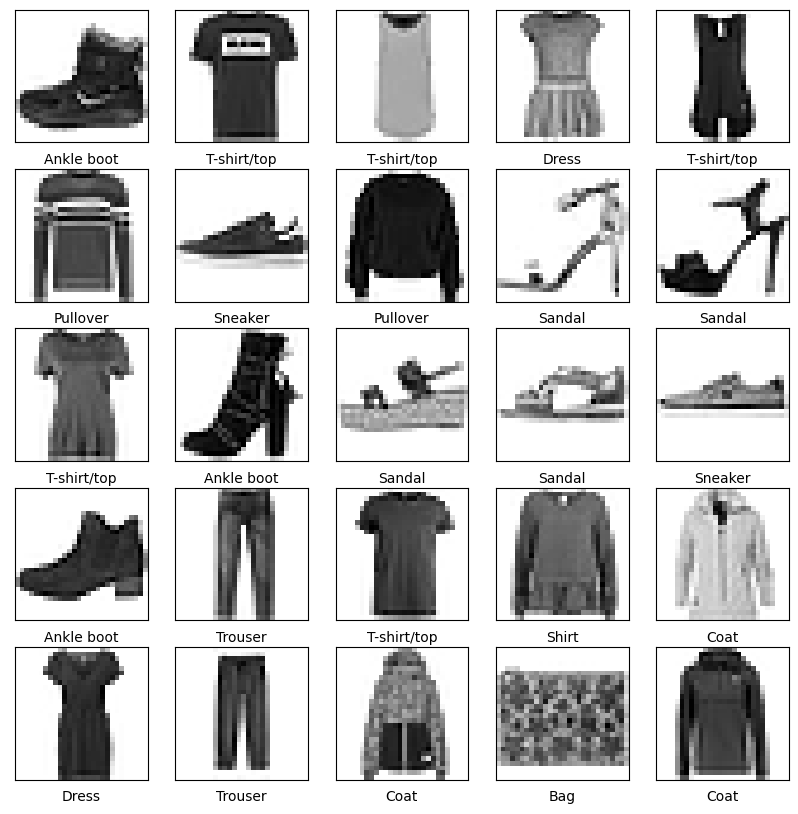

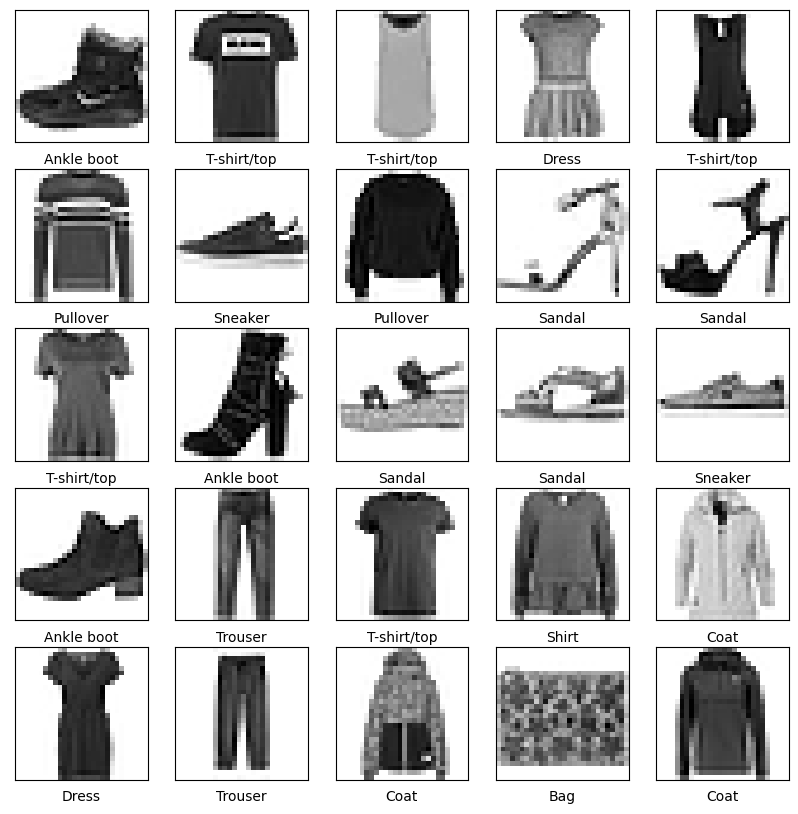

In [7]:
plt.figure(figsize=(10,10))  # figura 100x100


for i in range(25):   # 25 imagenes
    
    plt.subplot(5,5,i+1)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.grid(False)
    
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    
    plt.xlabel(label_names[y_train[i]])
     
    
plt.show();

### Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo. 

Los bloques de construccion básicos de una red neuronal son las *capas*. La función de las capas es extraer la características fundamentales de las imágenes para poder luego clasificarlas. La mayoria de las capas como `Dense`, tienen parametros que son aprendidos durante el entrenamiento.

La primera capa de esta red, `Flatten`, 
transforma el formato de las imágenes de un array bidimensional (28x28 pixeles) a un array unidimensional (28x28 pixeles = 784 pixeles). Se le llama "aplanado" porque pasamos de una matriz de 28x28 a un vector de 784 elemento.

Después de que los pixeles sean "aplanados", la secuencia consiste de dos capas `Dense`. También se llama a estas capa `Full connected`, pues está todo conectado con todo. La primera capa `Dense` tiene 128 nodos o neuronas. La segunda capa es una capa de 10 nodos *softmax* (regresión logística) que devuelve un array de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

Antes de que el modelo este listo para entrenar, se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilación del modelo:

* *Loss function* — Función de coste o pérdida. Funcióin a minimizar para el ajuste.

* *Optimizer* — Algoritmo de optimización.

* *Metrics* — Métrica para el ajuste.

El siguiente ejemplo usa *accuracy* (acierto) , la proporción de imágenes que son correctamente clasificadas.

https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Model: "sequential"
 Layer (type)                Output Shape              Param #   
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
 dense (Dense)               (None, 128)               100480    
                                                                 
                                                                 
 dense (Dense)               (None, 128)               100480    
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
                                                                 
 dense_1 (Dense)             (None, 

### Entrenamiento

In [11]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5018 - accuracy: 0.8244
Epoch 2/10
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3809 - accuracy: 0.8630
Epoch 3/10
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3387 - accuracy: 0.8765
Epoch 4/10
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3159 - accuracy: 0.8843
Epoch 5/10
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2971 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2971 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2818 - accuracy: 0.8960
Epoch 7/10
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2713 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2713 - accuracy: 0.8995
Epoch 8/10
1875/

### Evaluación y predicción

In [12]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 4s - loss: 0.3274 - accuracy: 0.8832 - 4s/epoch - 12ms/step
313/313 - 4s - loss: 0.3274 - accuracy: 0.8832 - 4s/epoch - 12ms/step

Test accuracy: 0.8831999897956848

Test accuracy: 0.8831999897956848


In [13]:
y_prob = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [14]:
y_prob[0]

array([2.8042021e-05, 3.1920179e-06, 2.3259922e-08, 3.6776740e-08,
       8.4763917e-07, 3.9044709e-03, 2.7605913e-06, 2.9125864e-02,
       1.3067106e-05, 9.6692175e-01], dtype=float32)

array([2.8042021e-05, 3.1920179e-06, 2.3259922e-08, 3.6776740e-08,
       8.4763917e-07, 3.9044709e-03, 2.7605913e-06, 2.9125864e-02,
       1.3067106e-05, 9.6692175e-01], dtype=float32)

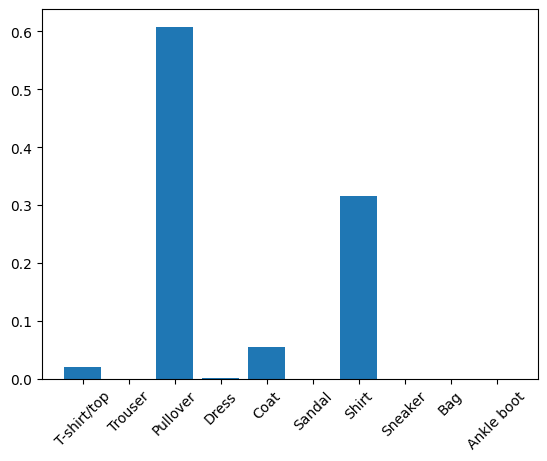

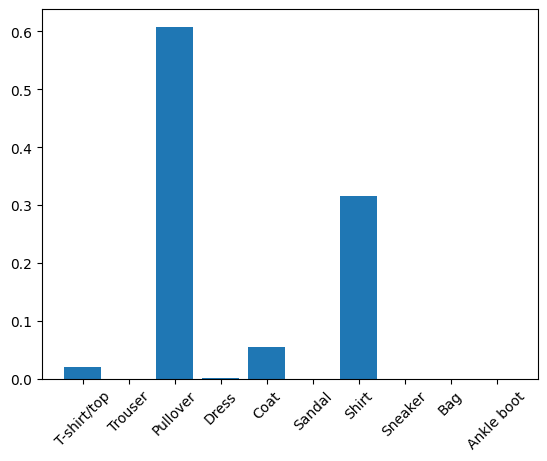

In [15]:
plt.bar(label_names.values() ,y_prob[600])
plt.xticks(rotation=45);

In [16]:
sum(y_prob[10])

0.9999999734164984

0.9999999734164984

In [17]:
np.argmax(y_prob[0])

9

9

In [18]:
label_names[np.argmax(y_prob[0])]

'Ankle boot'

'Ankle boot'

In [19]:
y_pred = np.argmax(y_prob, axis=1)

y_pred

array([9, 2, 1, ..., 8, 1, 5])

array([9, 2, 1, ..., 8, 1, 5])

In [20]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [21]:
print(report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.80      0.78      0.79      1000
           3       0.91      0.88      0.89      1000
           4       0.76      0.85      0.81      1000
           5       0.98      0.95      0.97      1000
           6       0.72      0.65      0.68      1000
           7       0.92      0.97      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.80      0.78      0.79      1000
           3       0.91 

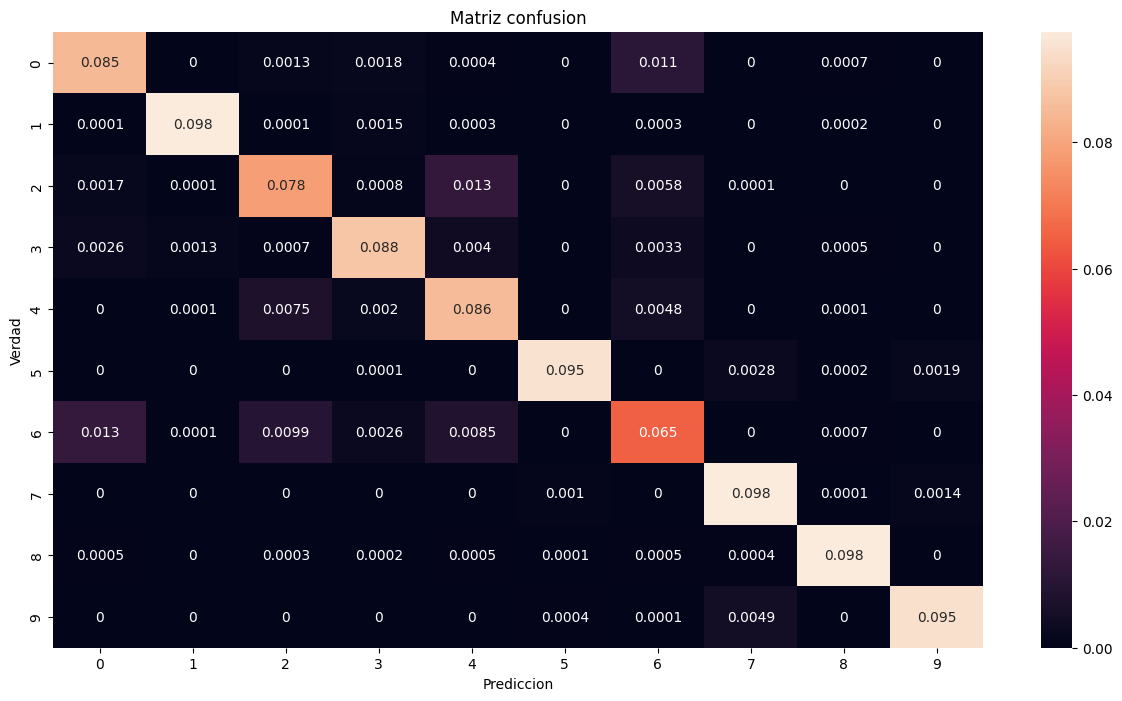

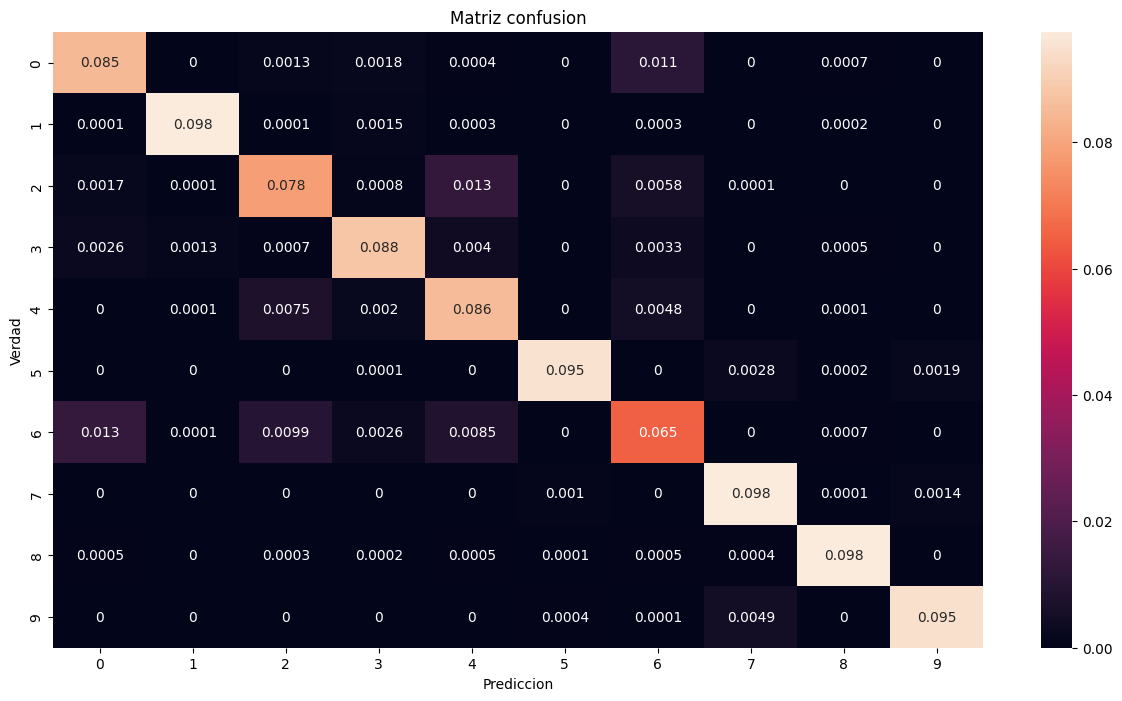

In [22]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred)/cm(y_test, y_pred).sum(), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [23]:
label_names

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

### Guardado y carga del modelo

In [24]:
model.save_weights('model/MNIST_weights.h5')    # pesos de la red

In [25]:
model.load_weights('model/MNIST_weights.h5')

In [26]:
model.save('model/MNIST_Model.h5')              # modelo completo

In [27]:
from keras.models import load_model

In [28]:
modelo_nuevo = load_model('model/MNIST_Model.h5')

In [29]:
modelo_nuevo.predict(X_test)[0]

313/313 [==============================] - 2s 5ms/step


array([2.8042021e-05, 3.1920179e-06, 2.3259922e-08, 3.6776740e-08,
       8.4763917e-07, 3.9044709e-03, 2.7605913e-06, 2.9125864e-02,
       1.3067106e-05, 9.6692175e-01], dtype=float32)

array([2.8042021e-05, 3.1920179e-06, 2.3259922e-08, 3.6776740e-08,
       8.4763917e-07, 3.9044709e-03, 2.7605913e-06, 2.9125864e-02,
       1.3067106e-05, 9.6692175e-01], dtype=float32)